# Imports:

In [1]:
from collections import defaultdict
import sys, os, re, argparse, natsort
import pandas as pd
import numpy as np
from tqdm import tqdm
if not sys.warnoptions:
    import warnings
    warnings.simplefilter("ignore")
from IPython.display import display, HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
<form action="javascript:code_toggle()"><input type="submit" value="Show/hide the code."></form>''')

# Functions:

In [2]:
def read_annotation(file):
    columns = ["sample", "total_circRNAs", "total_exonic", "true_exonic", "single_annotated_junction", 
               "antisens_exonic", "monoexonic", "total_infraexonic", "infraexonic_sens", 
               "infraexonic_antisens", "true_intronic", "non_annotated", "nb_c", "nb_nc", "nb_ccr"]
    df = pd.read_table(file, sep = '\t', names=columns)
    return df

In [ ]:
['cow-liver-B004', 'cow-liver-B004', 'cow-liver-B005', 'cow-liver-B005', 'cow-liver-B008', 'cow-liver-B008', 'cow-liver-B022', 'cow-liver-B022', 'cow-liver-B027', 'cow-liver-B027', 'cow-liver-B028', 'cow-liver-B028', 'cow-liver-K001', 'cow-liver-K001', 'cow-liver-K006', 'cow-liver-K006', 'cow-liver-K011', 'cow-liver-K011', 'cow-liver-K013', 'cow-liver-K013', 'cow-liver-K018', 'cow-liver-K018', 'cow-liver-K024', 'cow-liver-K024', 'cow-testis-adult1', 'cow-testis-adult1', 'cow-testis-adult2', 'cow-testis-adult2', 'cow-testis-adult3', 'cow-testis-adult3', 'cow-testis-neonat1', 'cow-testis-neonat1', 'cow-testis-neonat2', 'cow-testis-neonat2', 'cow-testis-neonat3', 'cow-testis-neonat3', 'pig-liver-old1', 'pig-liver-old1', 'pig-liver-old2', 'pig-liver-old2', 'pig-liver-young-1', 'pig-liver-young-1', 'pig-liver-young-2', 'pig-liver-young-2', 'pig-testis-31', 'pig-testis-31', 'pig-testis-5', 'pig-testis-5', 'pig-testis-54', 'pig-testis-54']

# I. Number of circRNAs for each category: 

In [14]:
df_stats_annot = read_annotation("../stats_annotation_all.tsv")

# reindex or change the order of rows
df_stats_annot = df_stats_annot.reindex([14, 23, 0, 4, 17, 21, 6, 16, 1, 22, 7, 11, 20, 15, 12, 
                                         18, 3, 2, 19, 5, 9, 24, 10, 13, 8])
# Rearrange rows in ascending order pandas python
display(df_stats_annot)

,sample,total_circRNAs,total_exonic,true_exonic,single_annotated_junction,antisens_exonic,monoexonic,total_infraexonic,infraexonic_sens,infraexonic_antisens,true_intronic,non_annotated,nb_c,nb_nc,nb_ccr
14,cow-liver-B004,1978,1253,1089,164,0,27,372,372,0,4,721,1083,0,31017
23,cow-liver-B005,1892,1144,1003,141,0,28,353,353,0,7,741,996,1,31446
0,cow-liver-B008,2185,1264,1105,159,0,41,457,456,1,4,916,1097,0,36846
4,cow-liver-B022,2187,1415,1240,175,0,33,324,324,0,5,767,1227,1,35638
17,cow-liver-B027,2794,1695,1477,218,0,42,613,609,4,4,1091,1461,3,47836
21,cow-liver-B028,2877,1661,1449,212,0,38,583,581,2,5,1209,1434,3,54975
6,cow-liver-K001,2052,1149,993,156,0,30,574,573,1,2,900,983,1,33829
16,cow-liver-K006,1804,1055,916,139,0,34,408,408,0,2,747,910,0,28320
1,cow-liver-K011,2214,1340,1175,165,0,33,491,490,1,4,869,1167,1,37564
22,cow-liver-K013,2233,1388,1207,181,0,36,456,454,2,3,840,1199,1,36473


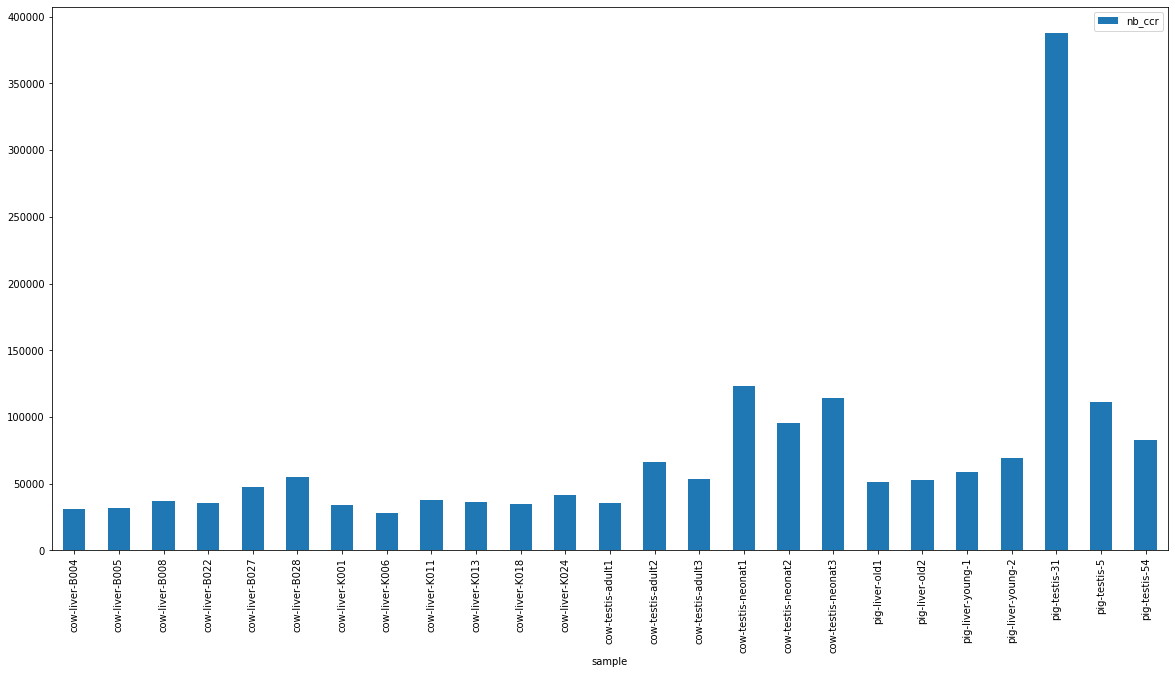

In [15]:
# Stacked bar plot: Number of CCR:
columns_nb_ccr = ["sample", "nb_ccr"]

df_nb_ccr = pd.DataFrame(df_stats_annot, columns=columns_nb_ccr)
df_nb_ccr.plot.bar(x='sample', stacked=True, figsize=(20,10));

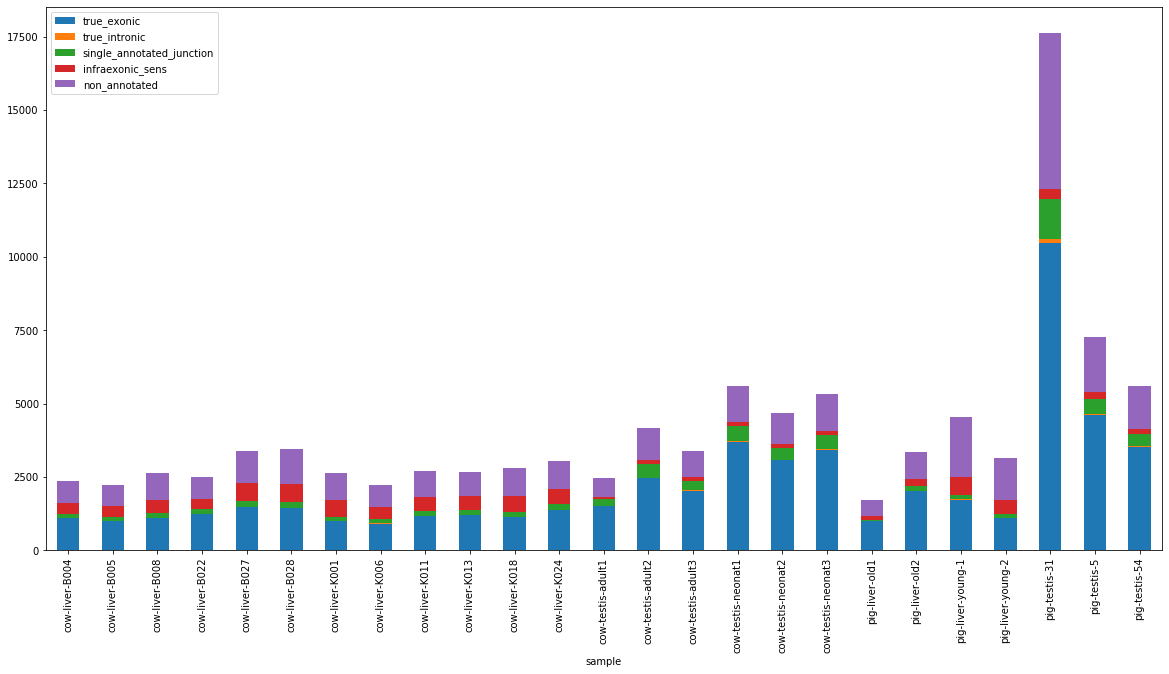

In [16]:
# Stacked bar plot:
columns_df1 = ["sample", "true_exonic", "true_intronic", "single_annotated_junction",
               "infraexonic_sens", "non_annotated"]

df1 = pd.DataFrame(df_stats_annot, columns=columns_df1)
df1.plot.bar(x='sample', stacked=True, figsize=(20,10));

In [ ]:
# Pie:
df1["tot"] = (df_stats_annot["true_exonic"] + df_stats_annot["true_intronic"] + 
              df_stats_annot["single_annotated_junction"] + df_stats_annot["infraexonic_sens"] + 
              df_stats_annot["non_annotated"])

df1["%_true_exonic"] = (df1["true_exonic"]*100)/df1["tot"]
df1["%_true_intronic"] = (df1["true_intronic"]*100)/df1["tot"]
df1["%_single_annotated_junction"] = (df1["single_annotated_junction"]*100)/df1["tot"]
df1["%_infraexonic_sens"] = (df1["infraexonic_sens"]*100)/df1["tot"]
df1["%_non_annotated"] = (df1["non_annotated"]*100)/df1["tot"]

d = df1.set_index('sample')[["%_true_exonic","%_true_intronic","%_single_annotated_junction", 
                             "%_infraexonic_sens", "%_non_annotated"]].T.to_dict('list')
df2 = pd.DataFrame(d, index=['True exonic', 'True intronic', 'Single annotated junction', 
                             'Infraexonic sens', 'Non annotated'])
display(df2.head(5))
plot = df2.plot.pie(subplots=True, autopct='%.2f', figsize=(40, 40), layout=(5,5));

,cow-liver-B004,cow-liver-B005,cow-liver-B008,cow-liver-B022,cow-liver-B027,cow-liver-B028,cow-liver-K001,cow-liver-K006,cow-liver-K011,cow-liver-K013,...,cow-testis-neonat1,cow-testis-neonat2,cow-testis-neonat3,pig-liver-old1,pig-liver-old2,pig-liver-young-1,pig-liver-young-2,pig-testis-31,pig-testis-5,pig-testis-54
True exonic,46.340426,44.677060,41.856061,49.382716,43.453957,41.927083,37.842988,41.410488,43.470218,44.953445,...,66.184868,65.590938,64.561008,57.701284,60.203167,37.612464,34.731490,59.360290,63.337460,62.941176
True intronic,0.170213,0.311804,0.151515,0.199124,0.117682,0.144676,0.076220,0.090416,0.147984,0.111732,...,0.321199,0.320581,0.432412,0.583431,0.507918,0.570551,0.699078,0.799637,0.371440,0.445633
Single annotated junction,6.978723,6.280624,6.022727,6.969335,6.413651,6.134259,5.945122,6.283906,6.104329,6.741155,...,9.243398,8.377859,8.685843,3.033839,4.571258,3.489138,3.590721,7.701469,7.332508,7.112299
Infraexonic sens,15.829787,15.723831,17.272727,12.903226,17.917034,16.811343,21.836890,18.444846,18.128006,16.908752,...,2.533904,3.312674,2.838879,7.759627,7.080968,13.298223,15.030187,1.911189,3.274178,3.333333
Non annotated,30.680851,33.006682,34.696970,30.545599,32.097676,34.982639,34.298780,33.770344,32.149464,31.284916,...,21.716631,22.397948,23.481857,30.921820,27.636690,45.029625,45.948522,30.227415,25.684413,26.167558


# II. Biotypes distribution:

In [ ]:
# Stacked bar plot:
columns_biotypes = ["sample", "nb_c", "nb_nc"]
df_biotypes = pd.DataFrame(df_stats_annot, columns=columns_biotypes)
df_biotypes.plot.bar(x='sample', stacked=True, figsize=(20,10));

,cow-liver-B022,pig-liver-old1,pig-testis-5,cow-liver-K013,cow-testis-neonat1,pig-liver-young-1,cow-testis-adult2,cow-liver-B005,cow-liver-B004,cow-testis-adult3,...,pig-testis-31,cow-liver-B008,cow-liver-K011,pig-liver-young-2,pig-liver-old2,pig-testis-54,cow-liver-B028,cow-liver-K006,cow-liver-K001,cow-liver-K018
Coding,99.918567,99.388379,99.389845,99.916667,99.810401,99.588235,99.918133,99.899699,100.0,99.901235,...,99.29173,100.0,99.914384,99.540441,99.353555,99.460227,99.791232,100.0,99.898374,99.821906
Non-coding,0.081433,0.611621,0.610155,0.083333,0.189599,0.411765,0.081867,0.100301,0.0,0.098765,...,0.70827,0.0,0.085616,0.459559,0.646445,0.539773,0.208768,0.0,0.101626,0.178094


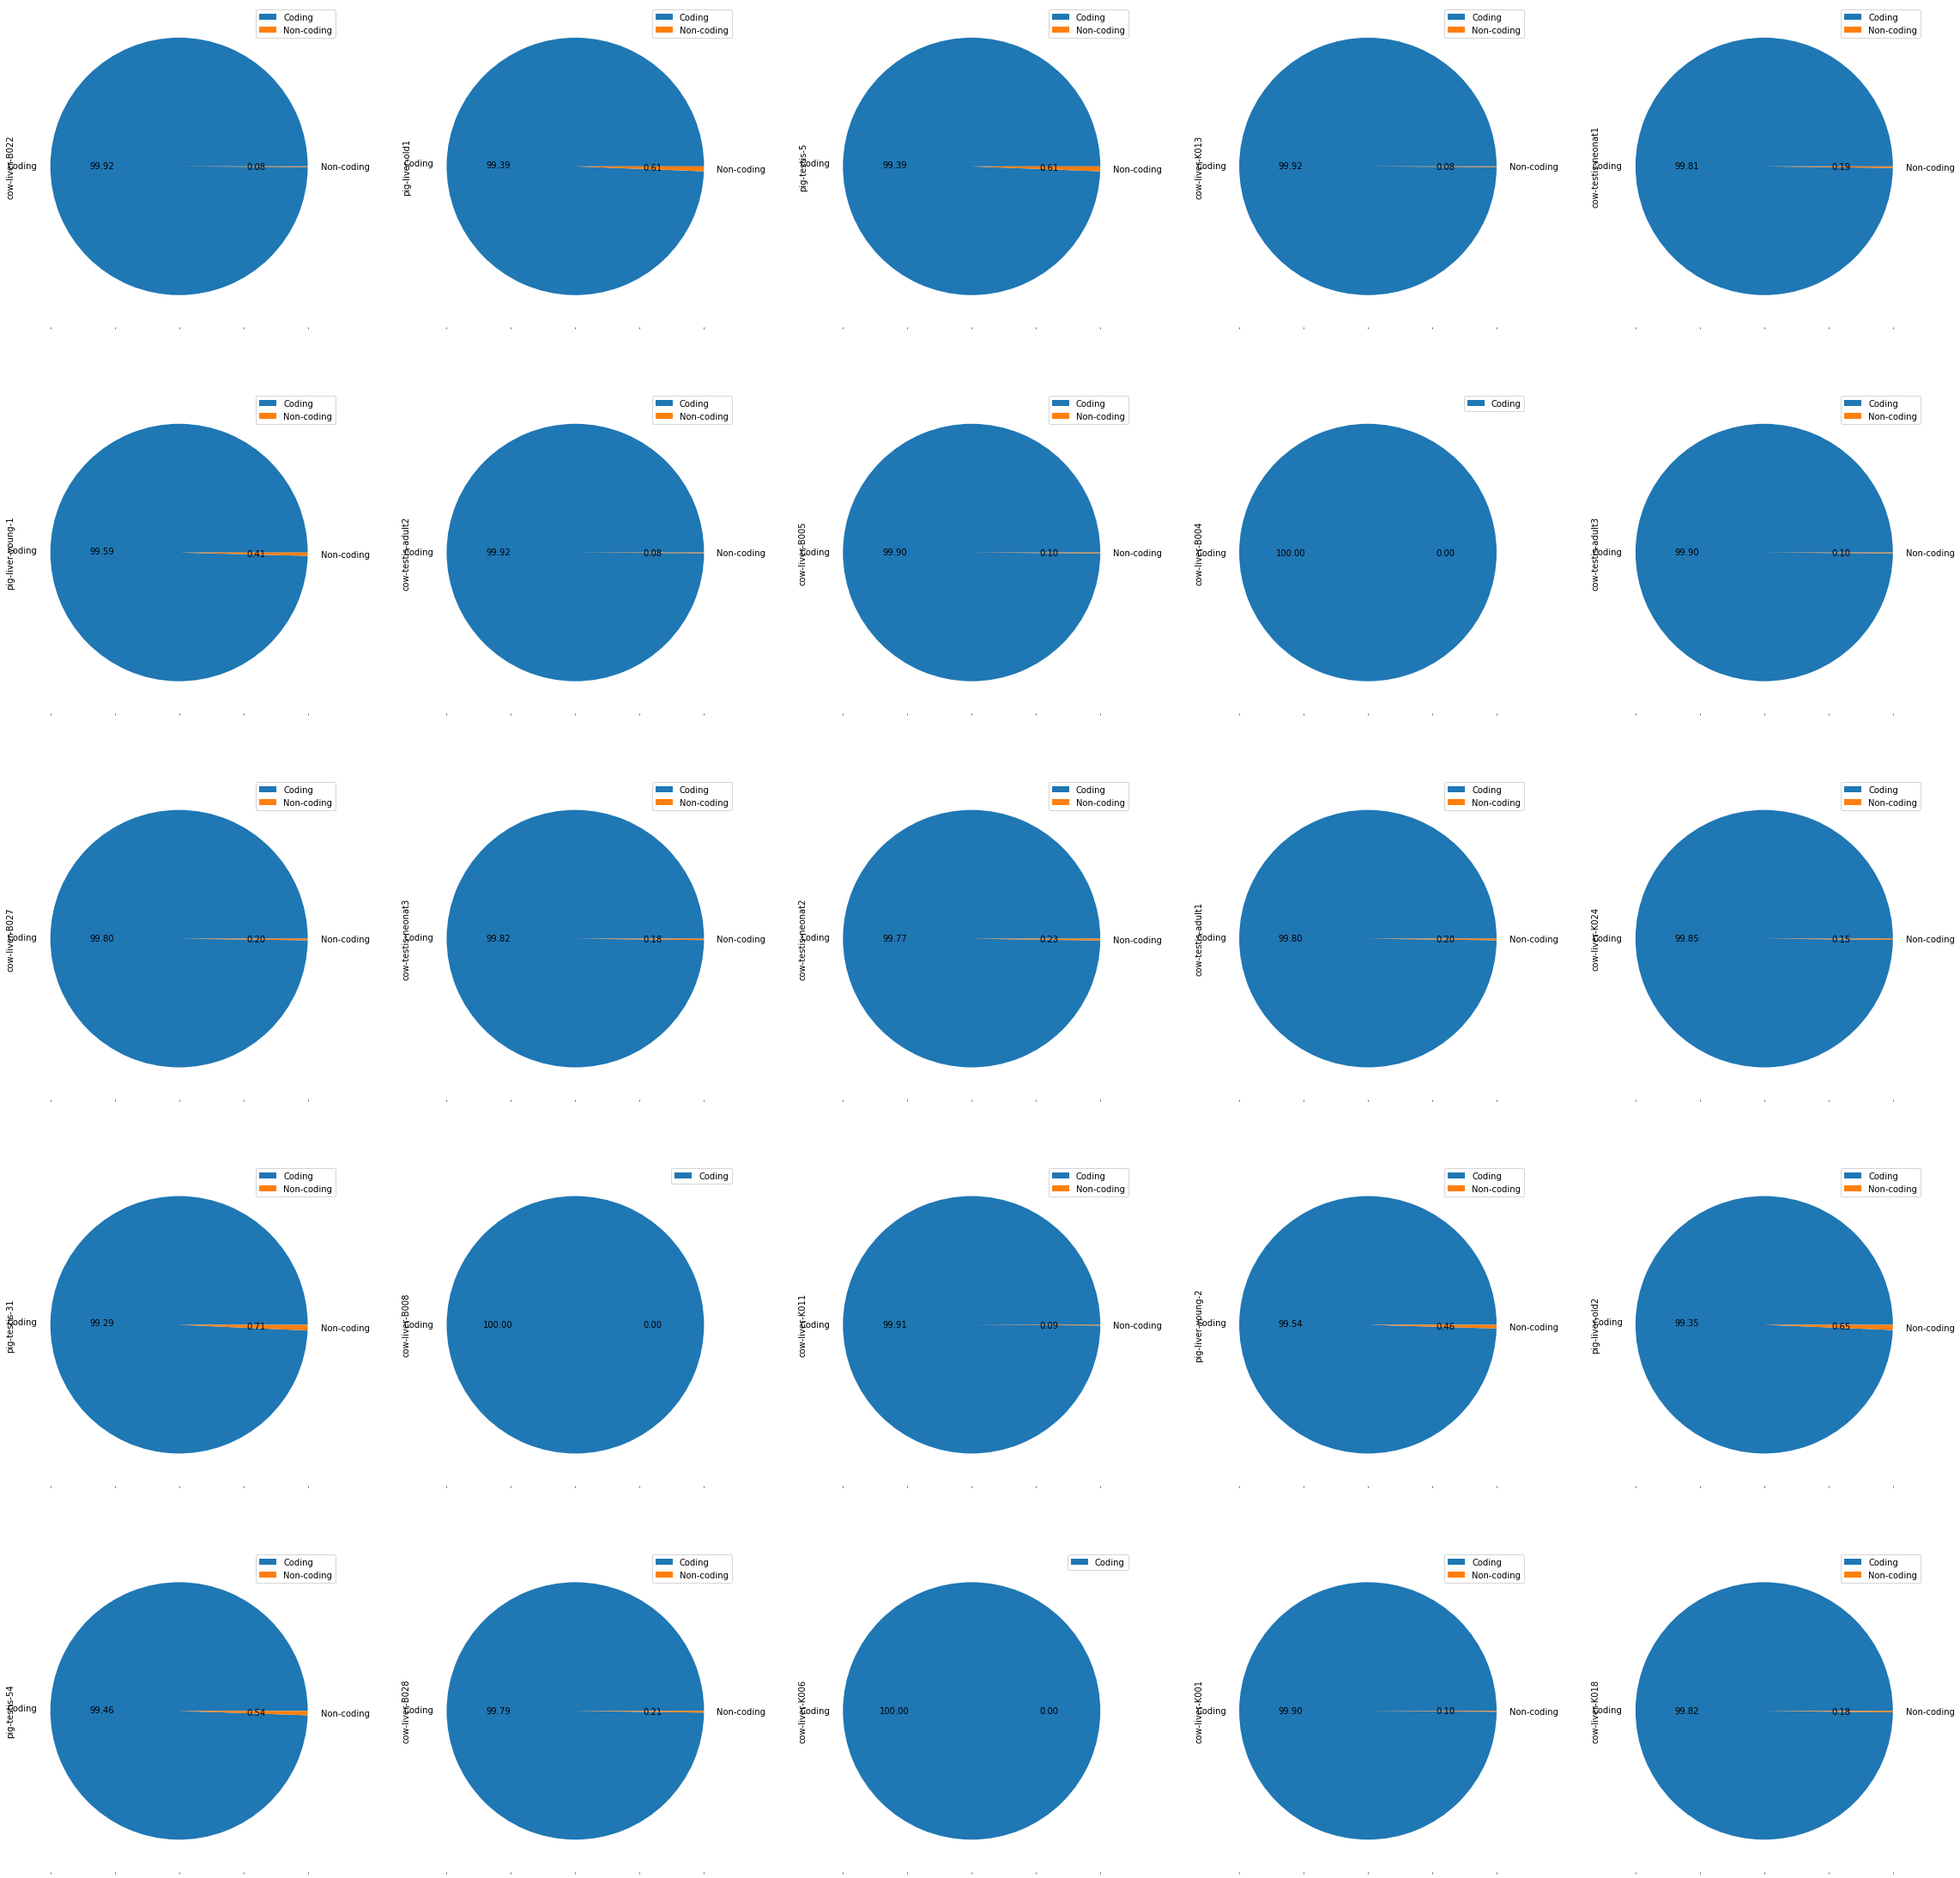

In [13]:
# Pie:
df_biotypes["nb_tot"] = df_biotypes["nb_c"] + df_biotypes["nb_nc"]
df_biotypes["%_c"] = (df_biotypes["nb_c"]*100)/df_biotypes["nb_tot"]
df_biotypes["%_nc"] = (df_biotypes["nb_nc"]*100)/df_biotypes["nb_tot"]

d = df_biotypes.set_index('sample')[["%_c","%_nc"]].T.to_dict('list')
df_biotypes_pie = pd.DataFrame(d, index=['Coding', 'Non-coding'])
display(df_biotypes_pie.head(5))
plot = df_biotypes_pie.plot.pie(subplots=True, autopct='%.2f', figsize=(40, 40), layout=(5,5));